## Mass completeness limit

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

from astropy.table import Table
from scipy import optimize, interpolate
import tqdm

In [2]:
bgs = Table.read('../data/BGS_ANY_full.provabgs.hdf5')

In [3]:
bgs_bright = bgs[bgs['is_bgs_bright']]
bgs_faint = bgs[bgs['is_bgs_faint']]
# bgs[:5]

In [4]:
mask_bright = (bgs_bright['Z_HP'] > 0.) & (bgs_bright['MAG_R'] > 0.) & (bgs_bright['provabgs_logMstar_bf'] > 0.)
mask_faint = (bgs_faint['Z_HP'] > 0.) & (bgs_faint['MAG_R'] > 0.) & (bgs_faint['provabgs_logMstar_bf'] > 0.)

In [5]:
z_bright = bgs_bright['Z_HP'][mask_bright]
x_bright = bgs_bright['provabgs_logMstar_bf'][mask_bright]
mag_r_bright = bgs_bright['MAG_R'][mask_bright]

z_faint = bgs_faint['Z_HP'][mask_faint]
x_faint = bgs_faint['provabgs_logMstar_bf'][mask_faint]
mag_r_faint = bgs_faint['MAG_R'][mask_faint]

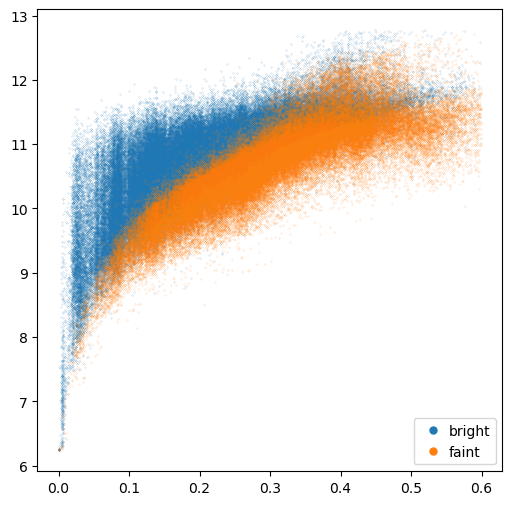

In [6]:
plt.figure(figsize=(6,6))
plt.plot(z_bright, x_bright, 'o', markersize=0.1, label='bright')
plt.plot(z_faint, x_faint, 'o', markersize=0.1, label='faint')
plt.legend(loc='lower right', fontsize=10, markerscale=50, handletextpad=0.1)

In [7]:
x = np.concatenate((x_faint, x_bright))
z = np.concatenate((z_faint, z_bright))
mag_r = np.concatenate((mag_r_faint, mag_r_bright))

In [8]:
logmstar_limit_bright = x + 0.4*(mag_r - 20.175)

In [9]:
faintest_20p = np.percentile(mag_r,20)
faintest_20p_mask = mag_r<faintest_20p

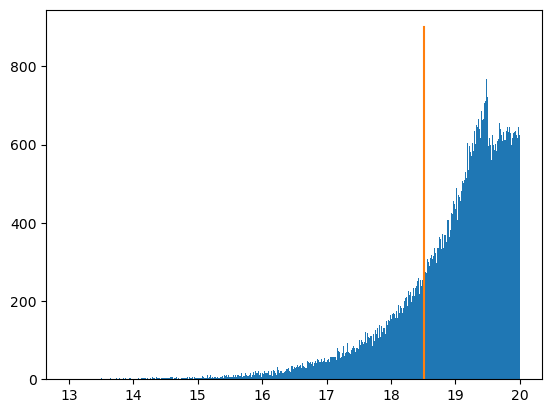

In [10]:
plt.hist(mag_r, range=(13,20), bins=1400)
plt.plot(np.repeat(faintest_20p, 10), np.linspace(0, 900, 10))

In [11]:
z_bins = np.arange(0,0.3, 0.0025)
z_limit = np.zeros((len(z_bins)-1))
mass_limit_bright = np.zeros((len(z_bins)-1))

In [12]:
for i in range(len(z_bins)-1):
    mask = (z>z_bins[i]) & (z<=z_bins[i+1]) & faintest_20p_mask
    z_limit[i] = np.nanpercentile(z[mask], 90)
    mass_limit_bright[i] = np.nanpercentile(logmstar_limit_bright[mask], 90)

In [13]:
mass_limit_bright_function = interpolate.interp1d(z_limit,mass_limit_bright, fill_value='extrapolate')

In [16]:
line = np.linspace(0.0,0.3, 100)

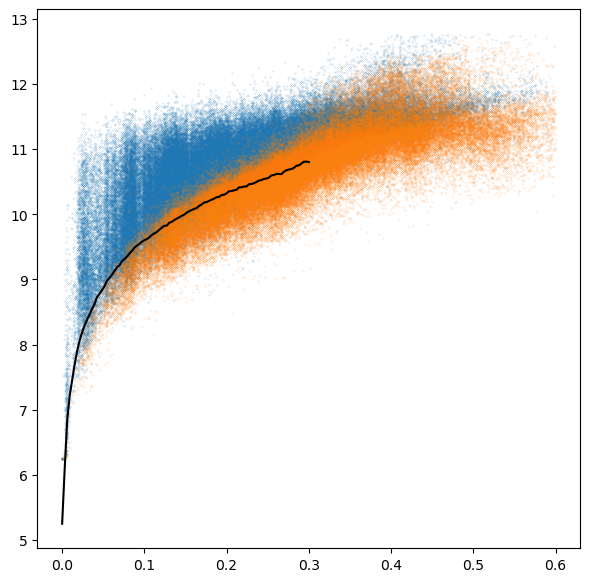

In [17]:
plt.figure(figsize=(7,7))
# plt.plot(z, x, 'o', markersize=0.1)
plt.plot(z_bright, x_bright, 'o', markersize=0.1, label='bright')
plt.plot(z_faint, x_faint, 'o', markersize=0.1, label='faint')
plt.plot(line, mass_limit_bright_function(line), color='k')
# plt.plot(z_bins[:-1], mass_limit_bright, 'o')
# plt.plot(np.repeat(0.01, 10), np.linspace(6,13, 10))

In [21]:
np.save('z_limit_bgs_faint.npy' ,z_limit)

In [22]:
np.save('mass_limit_faint.npy',mass_limit_bright)

In [ ]:
alpha2 = -1.48

In [ ]:
np.repeat(alpha2 , 10)[:,None] + 1

In [ ]:
bin_mask = (z > 0.4) & (z < 0.405) & faintest_20p_mask

In [ ]:
plt.hist(logmstar_limit_bright[bin_mask], range=(13,20), bins=1400)

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(z, mag_r, 'o', markersize=0.1)
plt.plot(line, np.repeat(faintest_20p, len(line)))

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(x, mag_r, 'o', markersize=0.1)

In [ ]:
mag_r.max()